In [21]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option("max_columns", 30)

# READING 3 DIFFERENENT DATASETS
trends = pd.read_csv("../Data/trends.csv")

ETH = pd.read_csv("../Data/ETH_price.csv")
ETH = ETH[["date", "close"]]

data = pd.read_csv("../Data/train_complete.csv")
# data = data.iloc[:100000, :]
data['time'] = data['time'].apply(lambda x: x[:10])

c = list(data.columns)
c[0] = "date"
data.columns = c

# MERGING AND CHANING COLUMNS
data = pd.merge(data, trends, on='date')
data = pd.merge(data, ETH, on='date')

data['date'] = pd.to_timedelta(pd.to_datetime(data['date']), unit = 'seconds').astype('timedelta64[D]')

data['prestige_time_limit'] = data['prestige_time_limit'].apply(lambda x: np.nan if pd.isnull(x) else x[:10])
data['prestige_time_limit'] = pd.to_timedelta(pd.to_datetime(data['prestige_time_limit']), unit = 'seconds').astype('timedelta64[D]')

data = data.fillna('0')

data.head(5)

,date,ID,USD,generation,color,is_fancy,is_exclusive,fancy_type,is_prestige,prestige_type,prestige_ranking,fancy_ranking,prestige_time_limit,enhanced_cattributes_eyes,enhanced_cattributes_pattern,enhanced_cattributes_body,enhanced_cattributes_mouth,enhanced_cattributes_colorprimary,enhanced_cattributes_colorsecondary,enhanced_cattributes_colortertiary,enhanced_cattributes_coloreyes,status_cooldown_index,status_is_ready,status_is_gestating,purrs_count,purrs_is_purred,watchlist_count,watchlist_is_watchlisted,cryptokitties,close
0,18081.0,882455,23.15,3.0,cyan,False,False,0,False,0,0,0,0,tongue,wiley,daemonwings,thunderstruck,koladiviya,cinderella,swampgreen,icy,1.0,True,False,1.0,False,0.0,False,0.54453,284.52
1,18081.0,1553435,0.51,9.0,dahlia,False,False,0,False,0,0,0,0,luckystripe,happygokitty,siberian,swarley,bananacream,rosequartz,frosting,dahlia,5.0,True,False,0.0,False,0.0,False,0.54453,284.52
2,18081.0,1061073,0.50,5.0,mintgreen,False,False,0,False,0,0,0,0,beard,rascal,bornwithit,highlander,bananacream,barkbrown,frosting,mintgreen,4.0,True,False,0.0,False,0.0,False,0.54453,284.52
3,18081.0,1155213,0.48,4.0,cyan,False,False,0,False,0,0,0,0,topoftheworld,serpent,rascal,koladiviya,greymatter,turtleback,azaleablush,cyan,2.0,True,False,0.0,False,0.0,False,0.54453,284.52
4,18081.0,982665,0.49,16.0,eclipse,False,False,0,False,0,0,0,0,selkirk,pouty,tiger,wowza,bananacream,lilac,frosting,eclipse,9.0,True,False,0.0,False,0.0,False,0.54453,284.52


In [22]:
data.shape

(107908, 30)

## OneHotEncode:


data[['color', 'fancy_type', 'prestige_type', 'enhanced_cattributes_eyes', 'enhanced_cattributes_pattern', 'enhanced_cattributes_body', 'enhanced_cattributes_mouth', 'enhanced_cattributes_colorprimary', 'enhanced_cattributes_colorsecondary', 'enhanced_cattributes_colortertiary', 'enhanced_cattributes_coloreyes']].info()

In [23]:
from collections import defaultdict
d = defaultdict(LabelEncoder)
# d = LabelEncoder()

In [24]:
fit = data[['color', 'fancy_type', 'prestige_type', 'enhanced_cattributes_eyes', 'enhanced_cattributes_pattern', 'enhanced_cattributes_body', 'enhanced_cattributes_mouth', 'enhanced_cattributes_colorprimary', 'enhanced_cattributes_colorsecondary', 'enhanced_cattributes_colortertiary', 'enhanced_cattributes_coloreyes']].apply(lambda x: d[x.name].fit_transform(x))

data[['color', 'fancy_type', 'prestige_type', 'enhanced_cattributes_eyes', 'enhanced_cattributes_pattern', 'enhanced_cattributes_body', 'enhanced_cattributes_mouth', 'enhanced_cattributes_colorprimary', 'enhanced_cattributes_colorsecondary', 'enhanced_cattributes_colortertiary', 'enhanced_cattributes_coloreyes']] = fit

In [25]:
data.head(10)

,date,ID,USD,generation,color,is_fancy,is_exclusive,fancy_type,is_prestige,prestige_type,prestige_ranking,fancy_ranking,prestige_time_limit,enhanced_cattributes_eyes,enhanced_cattributes_pattern,enhanced_cattributes_body,enhanced_cattributes_mouth,enhanced_cattributes_colorprimary,enhanced_cattributes_colorsecondary,enhanced_cattributes_colortertiary,enhanced_cattributes_coloreyes,status_cooldown_index,status_is_ready,status_is_gestating,purrs_count,purrs_is_purred,watchlist_count,watchlist_is_watchlisted,cryptokitties,close
0,18081.0,882455,23.15,3.0,6,False,False,0,False,0,0,0,0,134,182,44,187,110,31,130,63,1.0,True,False,1.0,False,0.0,False,0.54453,284.52
1,18081.0,1553435,0.51,9.0,7,False,False,0,False,0,0,0,0,73,70,161,182,15,137,53,36,5.0,True,False,0.0,False,0.0,False,0.54453,284.52
2,18081.0,1061073,0.50,5.0,16,False,False,0,False,0,0,0,0,11,127,20,88,15,13,53,83,4.0,True,False,0.0,False,0.0,False,0.54453,284.52
3,18081.0,1155213,0.48,4.0,6,False,False,0,False,0,0,0,0,136,145,140,105,84,172,6,32,2.0,True,False,0.0,False,0.0,False,0.54453,284.52
4,18081.0,982665,0.49,16.0,10,False,False,0,False,0,0,0,0,113,120,178,205,15,99,53,44,9.0,True,False,0.0,False,0.0,False,0.54453,284.52
5,18081.0,644417,2.68,2.0,16,False,False,0,False,0,0,0,0,81,155,170,80,39,85,13,126,1.0,True,False,1.0,False,0.0,False,0.54453,284.52
6,18081.0,1007561,0.52,3.0,5,False,False,0,False,0,0,0,0,100,4,197,96,175,160,71,30,1.0,True,False,0.0,False,0.0,False,0.54453,284.52
7,18081.0,1260395,0.53,10.0,3,False,False,0,False,0,0,0,0,130,171,194,162,57,102,114,22,5.0,True,False,0.0,False,0.0,False,0.54453,284.52
8,18081.0,1443277,0.53,9.0,18,False,False,0,False,0,0,0,0,90,91,15,129,69,32,114,53,4.0,True,False,0.0,False,0.0,False,0.54453,284.52
9,18081.0,1628215,0.51,2.0,10,False,False,0,False,0,0,0,0,124,184,95,61,84,129,53,44,1.0,True,False,1.0,False,0.0,False,0.54453,284.52


In [26]:
for c in d:
    print(c)
    np.save(f'Saved_encoder/{c}.npy', d[c].classes_)


color
fancy_type
prestige_type
enhanced_cattributes_eyes
enhanced_cattributes_pattern
enhanced_cattributes_body
enhanced_cattributes_mouth
enhanced_cattributes_colorprimary
enhanced_cattributes_colorsecondary
enhanced_cattributes_colortertiary
enhanced_cattributes_coloreyes


In [92]:
y = data["USD"]
X = data.drop("USD", axis = 1)

In [93]:
length = 100000 # number of last transactions to consider
n = 500 # the lastest values to predict on

y = y[:length]
X = X.iloc[:length, :]

X_test = X.iloc[:n, :]
y_test = y[:n]

X_train = X.iloc[n:, :]
y_train = y[n:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error

regr = RandomForestRegressor(n_estimators=500, verbose= 3,n_jobs=8)
# regr = KNeighborsRegressor(n_neighbors=5)
# regr = ElasticNet(max_iter=3000)
# regr = SVR()
regr.fit(X_train, y_train)

pred = regr.predict(X_train)
print('model errors')
print('MSE (mean sqaured error) : ' + str(mean_squared_error(y_train, pred)))
print('MAE (mean absolute error): ' + str(mean_absolute_error(y_train, pred)))
print('MSE (median absolute error): ' + str(median_absolute_error(y_train, pred)))

pred = regr.predict(X_test)
print('future prediction errors (n next sales)')
print('MSE (mean sqaured error) : ' + str(mean_squared_error(y_test, pred)))
print('MAE (mean absolute error): ' + str(mean_absolute_error(y_test, pred)))
print('MSE (median absolute error): ' + str(median_absolute_error(y_test, pred)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500building tree 4 of 500
building tree 5 of 500
building tree 6 of 500building tree 7 of 500
building tree 8 of 500


building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    6.2s


building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66

[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   43.6s


building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500building tree 138 of 500

building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500


[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.7min


building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  3.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    2.5s


model errors
MSE (mean sqaured error) : 169.8633120075123
MAE (mean absolute error): 1.3276599298756986
MSE (median absolute error): 0.25977723311409995
future prediction errors (n next sales)
MSE (mean sqaured error) : 9128.861499639243
MAE (mean absolute error): 10.784288081997559
MSE (median absolute error): 1.095850111111123


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


## NEED TO DO SOME ANALYSIS ON THIS !
model errors
MSE (mean sqaured error) : 174.33380389800092
MAE (mean absolute error): 1.1218385148453907
MSE (median absolute error): 0.18300000000000083
future prediction errors (n next sales)
MSE (mean sqaured error) : 560.5217976680833
MAE (mean absolute error): 5.362613670463795
MSE (median absolute error): 0.8965783333333339

### 500
model errors
MSE (mean sqaured error) : 166.15299643709815
MAE (mean absolute error): 1.3241130243884693
MSE (median absolute error): 0.2505999999999992
future prediction errors (n next sales)
MSE (mean sqaured error) : 8827.180182270149
MAE (mean absolute error): 10.476979029267401
MSE (median absolute error): 0.9681000000000008

In [89]:
p = []
a = []
for i in range(0,100):
#     print(regr.predict(X_test.iloc[-i,:].values.reshape(1,-1)),y_test.iloc[-i])
    p.append(round(list(regr.predict(X_test.iloc[-i,:].values.reshape(1,-1)))[0],3))
    a.append(y_test.iloc[-i])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

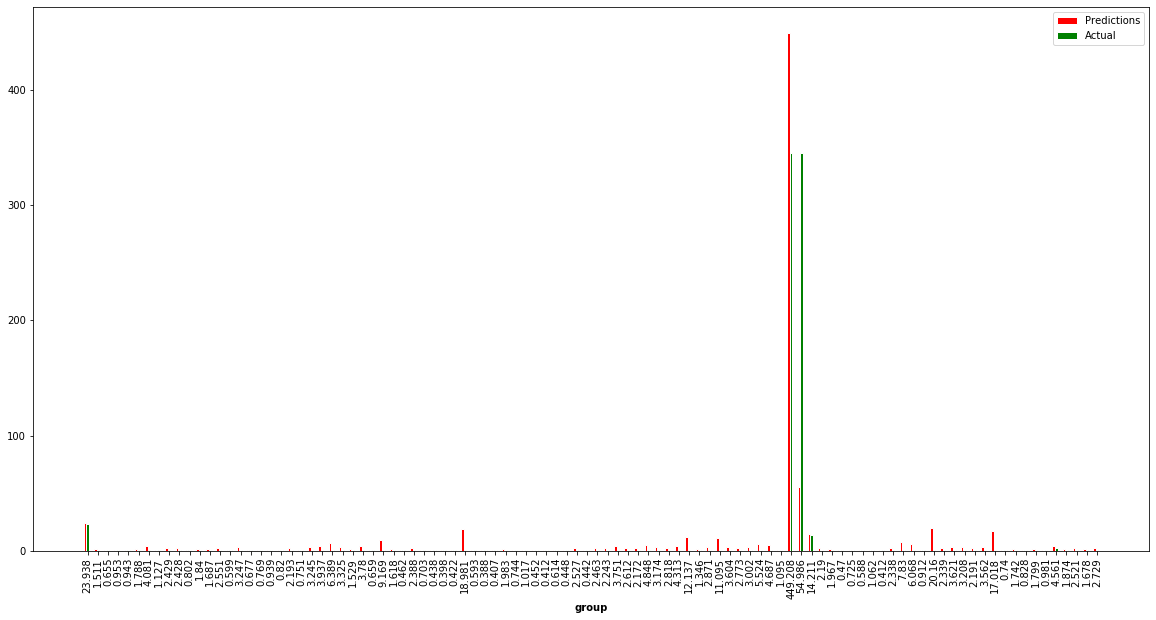

In [90]:
# set width of bar
import matplotlib.pyplot as plt
%matplotlib inline
barWidth = 0.25

f = plt.figure(figsize=(20,10))
bars1 = p
bars2 = a
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Predictions')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='Actual')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], p, rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [35]:
res = dict()
for i in range(len(X.columns)):
    res.update({X.columns[i]: regr.feature_importances_[i]})
    print(i, end = "\r")
    


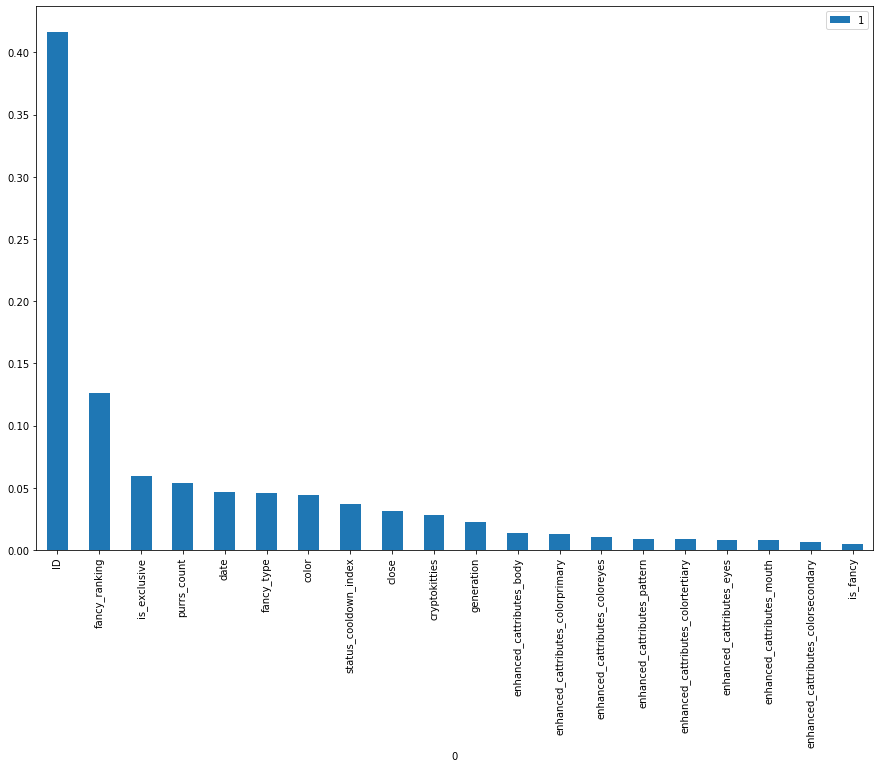

In [36]:
import warnings
warnings.filterwarnings("ignore")
pd.DataFrame(res.items()).sort_values(by = 1, ascending=False)[:20].plot.bar(x = 0,figsize=(15,10))

In [37]:
import pickle
import datetime
filename = "Saved_models/ML_Model_" + datetime.datetime.now().isoformat().replace(':', "-")[:-7] + ".sav"
pickle.dump(regr, open(filename, 'wb'))